# Aula 04: Utilização de Vídeo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
%matplotlib inline
from IPython.display import display, clear_output
import time

In [3]:
def camera_test(camera):
    if camera:
        # if iyou want to use camera 
        cap = cv2.VideoCapture(0)
        print(cap)
    else:
        # use video file instead of camera
        cap = cv2.VideoCapture('img/sample_ufpbots.mp4')
    return cap

In [4]:
cap = camera_test(True)
# cap.set(cv2.CAP_PROP_SETTINGS , 1 );

<VideoCapture 0x7f0e5cc694b0>


00. cv2.CAP_PROP_POS_MSEC Current position of the video file in milliseconds.
01. cv2.CAP_PROP_POS_FRAMES 0-based index of the frame to be decoded/captured next.
02. cv2.CAP_PROP_POS_AVI_RATIO Relative position of the video file: 0 - start of the film, 1 - end of the film.
03. cv2.CAP_PROP_FRAME_WIDTH Width of the frames in the video stream.
04. cv2.CAP_PROP_FRAME_HEIGHT Height of the frames in the video stream.
05. cv2.CAP_PROP_FPS Frame rate.
06. cv2.CAP_PROP_FOURCC 4-character code of codec.
07. cv2.CAP_PROP_FRAME_COUNT Number of frames in the video file.
08. cv2.CAP_PROP_FORMAT Format of the Mat objects returned by retrieve() .
09. cv2.CAP_PROP_MODE Backend-specific value indicating the current capture mode.
10. cv2.CAP_PROP_BRIGHTNESS Brightness of the image (only for cameras).
11. cv2.CAP_PROP_CONTRAST Contrast of the image (only for cameras).
12. cv2.CAP_PROP_SATURATION Saturation of the image (only for cameras).
13. cv2.CAP_PROP_HUE Hue of the image (only for cameras).
14. cv2.CAP_PROP_GAIN Gain of the image (only for cameras).
15. cv2.CAP_PROP_EXPOSURE Exposure (only for cameras).
16. cv2.CAP_PROP_CONVERT_RGB Boolean flags indicating whether images should be converted to RGB.
17. cv2.CAP_PROP_WHITE_BALANCE_U The U value of the whitebalance setting (note: only supported by DC1394 v 2.x backend currently)
18. cv2.CAP_PROP_WHITE_BALANCE_V The V value of the whitebalance setting (note: only supported by DC1394 v 2.x backend currently)
19. cv2.CAP_PROP_RECTIFICATION Rectification flag for stereo cameras (note: only supported by DC1394 v 2.x backend currently)
20. cv2.CAP_PROP_ISO_SPEED The ISO speed of the camera (note: only supported by DC1394 v 2.x backend currently)
21. cv2.CAP_PROP_BUFFERSIZE Amount of frames stored in internal buffer memory (note: only supported by DC1394 v 2.x backend currently)

In [5]:
for i in range(0,22):
    print(i, ' : ', cap.get(i))

0  :  0.0
1  :  -1.0
2  :  -1.0
3  :  640.0
4  :  480.0
5  :  30.0
6  :  1448695129.0
7  :  -1.0
8  :  16.0
9  :  0.0
10  :  50.0
11  :  50.0
12  :  70.0
13  :  0.0
14  :  -1.0
15  :  600.0
16  :  1.0
17  :  -1.0
18  :  -1.0
19  :  -1.0
20  :  2.0
21  :  1.0


In [6]:
#cap.set(cv2.CAP_PROP_AUTO_EXPOSURE, 1)
cap.set(cv2.CAP_PROP_FPS, 15)

True

In [7]:
def camera_settings(brightness, contrast, saturation, exposure):

    cap.set(cv2.CAP_PROP_BRIGHTNESS, brightness)
    cap.set(cv2.CAP_PROP_CONTRAST, contrast)
    cap.set(cv2.CAP_PROP_SATURATION, saturation)
    cap.set(cv2.CAP_PROP_EXPOSURE, exposure)
        
    ret, frame = cap.read()
    imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(imgRGB)

In [8]:
interact(camera_settings,
        brightness=widgets.IntSlider(min=0,max=255,step=1,value=50),
        contrast=widgets.IntSlider(min=0, max=255, step=1, value=50),
        saturation=widgets.IntSlider(min=0, max=255, step=1, value=70),
        exposure=widgets.IntSlider(min=0, max=1250, step=10, value=600))

interactive(children=(IntSlider(value=50, description='brightness', max=255), IntSlider(value=50, description=…

<function __main__.camera_settings(brightness, contrast, saturation, exposure)>

In [9]:
cap.release()

In [10]:
cap = camera_test(True)

<VideoCapture 0x7f0e63e47270>


<Figure size 432x288 with 0 Axes>

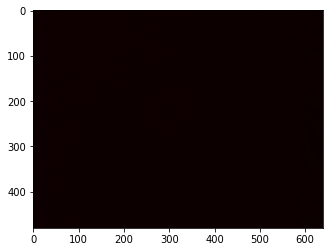

In [11]:
r = plt.gcf().canvas.get_renderer()
fig = plt.figure()

def get_frame():
    ret, frame = cap.read()
    imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    screen = plt.imshow(imgRGB)
#   screen.make_image(r)
    display(fig)
    clear_output(wait = True)
#   time.sleep(0.05)

for i in range(0,5):
    get_frame()

In [12]:
cap.release()

In [13]:
cap = camera_test(True)

while(True):
    ret, frame = cap.read()
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

<VideoCapture 0x7f0e2cefa030>


<VideoCapture 0x7f0e63e473d0>


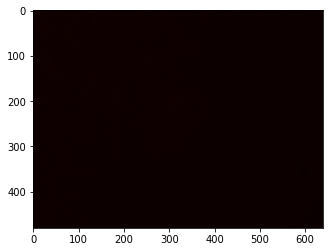

In [14]:
cap = camera_test(True)

ret, frame = cap.read()
imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

cap.release()

In [15]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0/gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [16]:
newimg = np.zeros(frame.shape, np.uint8)

def plot_func(contrast, brightness, gamma):    
    newimg = cv2.convertScaleAbs(frame, alpha=contrast, beta=brightness)
    newimg = adjust_gamma(newimg,gamma)

    imgRGB = cv2.cvtColor(newimg, cv2.COLOR_BGR2RGB)
    plt.imshow(imgRGB)

In [17]:
interact(plot_func,
        contrast=widgets.FloatSlider(min=0.0, max=3.0, step=0.01, value=1.0),
        brightness=widgets.FloatSlider(min=-255,max=255,step=1,value=0),
        gamma=widgets.FloatSlider(min=0.01, max=4.0, step=0.01, value=1.0))

interactive(children=(FloatSlider(value=1.0, description='contrast', max=3.0, step=0.01), FloatSlider(value=0.…

<function __main__.plot_func(contrast, brightness, gamma)>

In [18]:
cap = camera_test(False)

In [19]:
g, frame = cap.read()

interact(plot_func,
        contrast=widgets.FloatSlider(min=0.0, max=3.0, step=0.01, value=1.0),
        brightness=widgets.FloatSlider(min=-255,max=255,step=1,value=0),
        gamma=widgets.FloatSlider(min=0.01, max=4.0, step=0.01, value=1.0))

interactive(children=(FloatSlider(value=1.0, description='contrast', max=3.0, step=0.01), FloatSlider(value=0.…

<function __main__.plot_func(contrast, brightness, gamma)>

In [20]:
contrast = 0.5
brightness = 60
gamma = .5

In [21]:
newimg = np.zeros(frame.shape, np.uint8)
def find_color(rmin, rmax, gmin, gmax, bmin, bmax):
    fig, ax = plt.subplots(figsize=(9, 3))

    newimg = cv2.convertScaleAbs(frame, alpha=contrast, beta=brightness)
    newimg = adjust_gamma(newimg,gamma)
    hsv = cv2.cvtColor(newimg, cv2.COLOR_BGR2HSV)

    # construct a mask for the color "green", then perform
    # a series of dilations and erosions to remove any small
    # blobs left in the mask
    mask = cv2.inRange(hsv, (rmin,gmin,bmin), (rmax,gmax,bmax))
    
    # The basic idea of erosion is just like soil erosion only, 
    # it erodes away the boundaries of foreground object (Always 
    # try to keep foreground in white). So what it does? The 
    # kernel slides through the image (as in 2D convolution). 
    # A pixel in the original image (either 1 or 0) will be 
    # considered 1 only if all the pixels under the kernel is 1, 
    # otherwise it is eroded (made to zero).

    # So what happends is that, all the pixels near boundary will 
    # be discarded depending upon the size of kernel. So the 
    # thickness or size of the foreground object decreases or simply 
    # white region decreases in the image. It is useful for removing 
    # small white noises (as we have seen in colorspace chapter), 
    # detach two connected objects etc.

    # Here, as an example, I would use a 5x5 kernel with full of 
    # ones. Let’s see it how it works:
    
    mask = cv2.erode(mask, None, iterations=2)
    
    # It is just opposite of erosion. Here, a pixel element is ‘1’ 
    # if atleast one pixel under the kernel is ‘1’. So it increases 
    # the white region in the image or size of foreground object 
    # increases. Normally, in cases like noise removal, erosion is 
    # followed by dilation. Because, erosion removes white noises, 
    # but it also shrinks our object. So we dilate it. Since noise 
    # is gone, they won’t come back, but our object area increases. 
    # It is also useful in joining broken parts of an object.
    
    mask = cv2.dilate(mask, None, iterations=2)

    ax1 = plt.subplot(121)
    ax1.axis("off")
    ax1.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    ax2 = plt.subplot(122)
    ax2.axis("off")
    ax2.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

In [22]:
interact(find_color,
        rmin=widgets.FloatSlider(min=0, max=255, step=1, value=31),
        rmax=widgets.FloatSlider(min=0, max=255, step=1, value=68),
        gmin=widgets.FloatSlider(min=0, max=255, step=1, value=100),
        gmax=widgets.FloatSlider(min=0, max=255, step=1, value=255),
        bmin=widgets.FloatSlider(min=0, max=255, step=1, value=0),
        bmax=widgets.FloatSlider(min=0, max=255, step=1, value=255))

interactive(children=(FloatSlider(value=31.0, description='rmin', max=255.0, step=1.0), FloatSlider(value=68.0…

<function __main__.find_color(rmin, rmax, gmin, gmax, bmin, bmax)>

In [23]:
# define the lower and upper boundaries of the "green"
# ball in the HSV color space, then initialize the
# list of tracked points
greenLower = (0, 150, 80)
greenUpper = (40, 255, 255)

<Figure size 432x288 with 0 Axes>

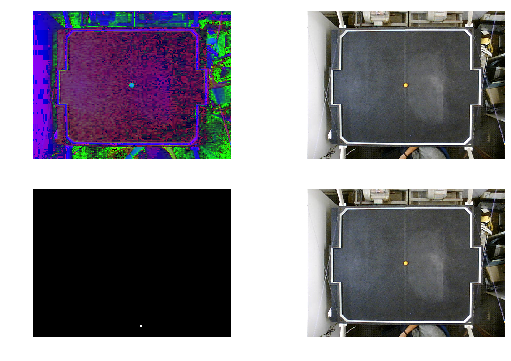

In [24]:
r = plt.gcf().canvas.get_renderer()
# fig = plt.figure()

fig, ax = plt.subplots(figsize=(9, 6))

def play():
#     while True:
    for i in range(0,3):
        grabbed, frame = cap.read()
        frame2 = np.copy(frame)
        if not grabbed:
            break
            
#         blurred = cv2.GaussianBlur(frame, (11, 11), 0)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
        # construct a mask for the color "green", then perform
        # a series of dilations and erosions to remove any small
        # blobs left in the mask
        mask = cv2.inRange(hsv, greenLower, greenUpper)
        mask = cv2.erode(mask, None, iterations=2)
        mask = cv2.dilate(mask, None, iterations=2)
        
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)[-2]
        center = None
                
        # only proceed if at least one contour was found
        if len(cnts) > 0:
            # find the largest contour in the mask, then use
            # it to compute the minimum enclosing circle and
            # centroid
            c = max(cnts, key=cv2.contourArea)
            ((x, y), radius) = cv2.minEnclosingCircle(c)
            M = cv2.moments(c)
            center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

            # only proceed if the radius meets a minimum size
            if (radius < 300) & (radius > 10 ) : 
                # draw the circle and centroid on the frame,
                # then update the list of tracked points
                cv2.circle(frame2, (int(x), int(y)), int(radius),
                    (0, 255, 255), 10)
                cv2.circle(frame2, center, 5, (0, 0, 255), 20)

        ax1 = plt.subplot(221)
        ax1.axis("off")
        ax1.imshow(hsv)
        
        ax2 = plt.subplot(223)
        ax2.axis("off")
        ax2.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
        
        ax3 = plt.subplot(222)
        ax3.axis("off")
        ax3.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        
        ax4 = plt.subplot(224)
        ax4.axis("off")
        ax4.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
        
        display(fig)
        clear_output(wait = True)
        time.sleep(0.1)
play()
cap.release()